<h1> Amazon Food Reviews

We have Amazon Food Reviews with 10 features

1.Id

2.Product Id

3.UserID

4.Profile Name

5.Helpfulness Numerator

6.Helpfulness Denominator

7.Score

8.Time

9.Summary

10.Text

# Objective

We have 10 features from that we will use text feature to predict given review is positive or negative

# Positive and Negative conversion

Here we are considering the 0 for negative reviews which has score less than 3 and 1 for positive reviews which has score greater than 3 and we are leaving the neutral reviews

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
# using sqlite3 we have import data of Amazon food reviews from database
import sqlite3
connection = sqlite3.connect('D:/AI_stuff/dataset/Amazon food reviews/database.sqlite')

food_data = pd.read_sql_query('select * from reviews ',connection)

food_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [3]:
food_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Here we are leaving neutral reviews which has score 3
food_data = pd.read_sql_query('select * from reviews where score != 3',connection)


In [5]:
# Here are replacing review score 1,2 as 0 and 4,5 as a 1.
# O is Negative reviews
# 1 is positive reviews
def partition(x):
    if x<3:
        return 0
    return 1

actualScore = food_data['Score']
positiveNegative = actualScore.map(partition)
food_data['Score'] = positiveNegative

In [6]:
# check the score
food_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
#Drop the duplicates from data and also helpfulness numerator is always lessthan helpfulness denominator
final = food_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)

final = final[final['HelpfulnessNumerator'] <=final['HelpfulnessDenominator']  ]


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Viji
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.

for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) #final string of cleaned words    
    final_string.append(str1)
    i+=1

In [10]:
final['FinalText'] = final_string
final['FinalText'] = final['FinalText'].str.decode('utf-8')

con  = sqlite3.connect('final_reviews.sqlite')

c = con.cursor()
con.text_factory = str

final.to_sql('Reviews', con,  schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [11]:
final_data = final.sample(n=100000)

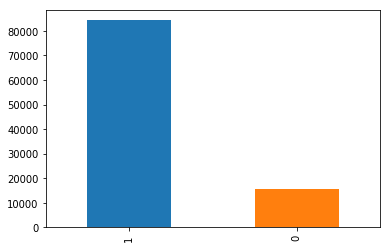

In [12]:
final_data['Score'].value_counts().plot(kind = 'bar')

#Train and test split

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = final_data['FinalText'].values
y = final_data['Score'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33)

# Bag of words

In [15]:
# try count vectorizer

bow = CountVectorizer()

X_train_bow = bow.fit_transform(X_train)

X_train_bow = preprocessing.normalize(X_train_bow)

X_test_bow = bow.transform(X_test)

X_test_bow = preprocessing.normalize(X_test_bow)

X_cv_bow = bow.transform(X_cv)

X_cv_bow = preprocessing.normalize(X_cv_bow)

print("Shape of independent varibles")
print(X_train_bow.shape)
print(X_test_bow.shape)
print(X_cv_bow.shape)

print("Shape of dependent varibles")
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)



Shape of independent varibles
(44890, 26219)
(33000, 26219)
(22110, 26219)
Shape of dependent varibles
(44890,)
(33000,)
(22110,)



#Parameter tuning 

In [16]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
Penalities = ['l1','l2']

cv_scores = []

train_scores = []

i=0

for a in C:
  for p in Penalities:
    logReg = LogisticRegression(penalty=p, C = a)
    logReg.fit(X_train_bow,y_train)
    scores = roc_auc_score(np.array(y_cv),logReg.predict_proba(X_cv_bow)[:,1])
    cv_scores.append(scores)
    scores = roc_auc_score(np.array(y_train),logReg.predict_proba(X_train_bow)[:,1])
    train_scores.append(scores)

    print("Cv scores {} and train Scores {} alpha {} penalty {}".format(cv_scores[i],train_scores[i],a,p))
    i +=1
 
  
  
  


Cv scores 0.5 and train Scores 0.5 alpha 1e-05 penalty l1
Cv scores 0.6321765940681962 and train Scores 0.6293939750030287 alpha 1e-05 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.0001 penalty l1
Cv scores 0.6866286364449905 and train Scores 0.682506872227753 alpha 0.0001 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.001 penalty l1
Cv scores 0.8498860869711721 and train Scores 0.8455315047935363 alpha 0.001 penalty l2
Cv scores 0.7301548316191949 and train Scores 0.722066867688247 alpha 0.01 penalty l1
Cv scores 0.8814000003418428 and train Scores 0.8828386430708128 alpha 0.01 penalty l2
Cv scores 0.8974594345455162 and train Scores 0.8978474199277606 alpha 0.1 penalty l1
Cv scores 0.9173654707945332 and train Scores 0.922955796800606 alpha 0.1 penalty l2
Cv scores 0.9389818582773221 and train Scores 0.9492137125640403 alpha 1 penalty l1
Cv scores 0.9393946945743922 and train Scores 0.9537851176033707 alpha 1 penalty l2
Cv scores 0.9334115593919006 and train Scores 0.9

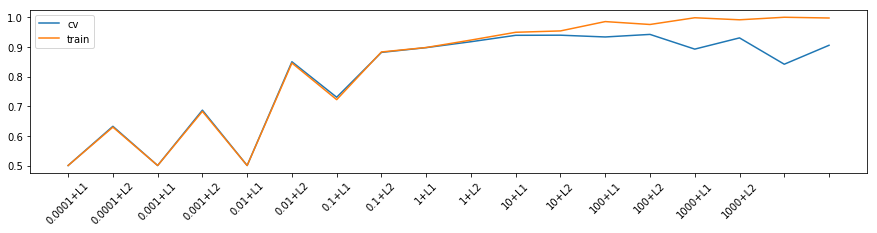

In [17]:
ticks = ['0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2','0.01+L1', '0.01+L2', '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1', '1000+L2']
plt.figure(figsize=(15,3))
plt.plot(range(len(C)*len(Penalities)), cv_scores)
plt.plot(range(len(C)*len(Penalities)), train_scores)
plt.xticks(range(len(C)*len(Penalities)), ticks, rotation = 45)
plt.legend(['cv','train'])
plt.show()

In [18]:
classifier = LogisticRegression(penalty = 'l2',C= 10)
classifier.fit(X_train_bow,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
pred = classifier.predict(X_test_bow)

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_confusion_matrix(data1,data2):
    cm = confusion_matrix(data1,data2)
    labels = ['negative','positive']
    sn.heatmap(cm, annot=True, xticklabels = labels, yticklabels = labels,fmt='g')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("Original Label")
    plt.show()

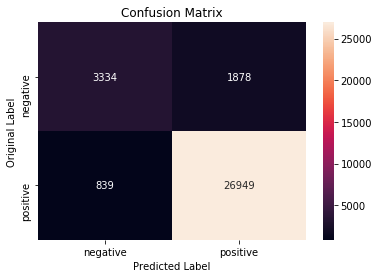

In [21]:
plot_confusion_matrix(y_test,pred)

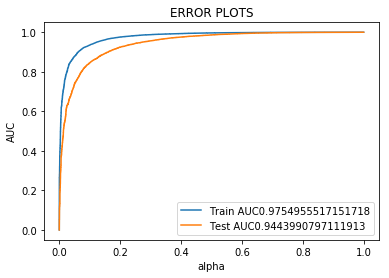

In [22]:
from sklearn.metrics import roc_curve,auc
train_fpr,train_tpr,thresholds = roc_curve(y_train,classifier.predict_proba(X_train_bow)[:,1])
test_fpr,test_tpr,thresholds = roc_curve(y_test,classifier.predict_proba(X_test_bow)[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC") 
plt.title("ERROR PLOTS")
plt.show()

# Checking Sparsity

In [23]:
alpha = [0.0001,0.001,0.01,1,10,100,1000]
sparse = []
for i in alpha:
  clf = LogisticRegression(penalty = 'l1',C = i)
  clf.fit(X_train_bow,y_train)
  sparse.append(np.count_nonzero(clf.coef_))
  #Converting to flattend array
  coef = clf.coef_.ravel()
  sparsity = np.mean(coef == 0) * 100
  print("For Aplha {} the count of Non Zeros is {} ".format(i,np.count_nonzero(clf.coef_)))
  print("Sparcity",sparsity) 

For Aplha 0.0001 the count of Non Zeros is 0 
Sparcity 100.0
For Aplha 0.001 the count of Non Zeros is 0 
Sparcity 100.0
For Aplha 0.01 the count of Non Zeros is 6 
Sparcity 99.97711583203021
For Aplha 1 the count of Non Zeros is 832 
Sparcity 96.82672870818871
For Aplha 10 the count of Non Zeros is 4299 
Sparcity 83.60349364964338
For Aplha 100 the count of Non Zeros is 7830 
Sparcity 70.13616079942027
For Aplha 1000 the count of Non Zeros is 8888 
Sparcity 66.10091918074679


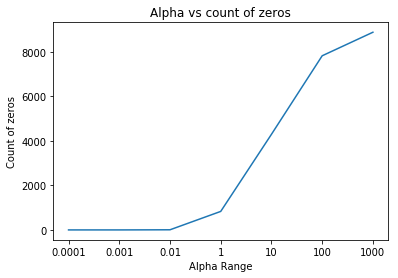

In [24]:
plt.title("Alpha vs count of zeros")
plt.xlabel("Alpha Range")
plt.ylabel("Count of zeros")
plt.xticks(range(len(alpha)),alpha)
plt.plot(range(len(alpha)),sparse)

plt.show()

<h2> The degree of sparcity was decreased with alpha

#Pertubation Test

In [25]:
epsilon = 0.0005
X_train_bow_new = X_train_bow.data + epsilon
X_train_bow_new.shape

(1422641,)

In [26]:
from scipy.sparse import csr_matrix
X_train_bow_new = csr_matrix((X_train_bow_new, X_train_bow.indices, X_train_bow.indptr), shape=X_train_bow.shape)
X_train_bow_new.shape

(44890, 26219)

In [27]:
logReg_new = LogisticRegression(penalty='l2',C=10)
logReg_new.fit(X_train_bow_new,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
weight = classifier.coef_+0.00001

In [29]:
weight_new = logReg_new.coef_

In [30]:
diff = weight - weight_new
change = diff*1.0/weight
percentage_change = change * 100
percentage_change = percentage_change[0]
percentage_change.shape

(26219,)

In [31]:
for i in range(10,101,10):
  print("{} the percentile value {}".format(i,np.percentile(percentage_change,i)))

10 the percentile value -0.521578917768788
20 the percentile value -0.2780949501522265
30 the percentile value -0.1570679906507062
40 the percentile value -0.06377874773734186
50 the percentile value 0.0247194404781569
60 the percentile value 0.11511224250715381
70 the percentile value 0.22765360686165392
80 the percentile value 0.39770986884818976
90 the percentile value 0.75146024742371
100 the percentile value 665.2521608358171


In [32]:
for i in range(90,101,1):
  print("{} the percentile value {}".format(i,np.percentile(percentage_change,i)))

90 the percentile value 0.75146024742371
91 the percentile value 0.8055181002411617
92 the percentile value 0.8899831908394702
93 the percentile value 0.9984893990267139
94 the percentile value 1.1208358626821986
95 the percentile value 1.2590320328900724
96 the percentile value 1.498328526051264
97 the percentile value 1.8023236341975515
98 the percentile value 2.41181100050161
99 the percentile value 4.322846765726238
100 the percentile value 665.2521608358171


In [33]:
for i in range(1,11,1):
  print("{} the percentile value {}".format((i*1.0/10)+99,np.percentile(percentage_change,(i*1.0/10)+99)))

99.1 the percentile value 4.885052104103475
99.2 the percentile value 5.213769822910118
99.3 the percentile value 5.750273393462715
99.4 the percentile value 6.567584371719056
99.5 the percentile value 7.472422381711629
99.6 the percentile value 8.862552381921555
99.7 the percentile value 12.076660692373423
99.8 the percentile value 17.2482734447233
99.9 the percentile value 27.161298591537232
100.0 the percentile value 665.2521608358171


<h2> we have heavy change after 99.9

In [34]:
percent_change = pd.DataFrame(data = percentage_change,index = bow.get_feature_names(),columns = ['Change'])
percent_change.head(5)

,Change
aa,-0.566809
aaa,0.606555
aaaahhhhhh,0.078323
aaah,-0.031434
aaf,-0.111207


In [35]:
percent_thre = percent_change[percent_change['Change']>39]
percent_thre.shape

(13, 1)

In [36]:
percent_thre.head(10)

,Change
bin,43.045656
counterbal,39.113052
infant,57.401710
lush,60.150139
maca,233.050270
movement,595.283559
nutter,46.990015
respons,76.418105
similac,95.052418
testi,41.439971


#Top 10 Features pf Positive and negative

In [37]:
feature = pd.DataFrame(data = classifier.coef_.reshape(-1,1),index = bow.get_feature_names())

In [38]:
# Top Negative Features
feature.sort_values(by = 0).head(10)

,0
worst,-15.693879
aw,-11.293244
disappoint,-9.965812
terribl,-9.885591
unpleas,-9.540671
cancel,-9.191269
yuck,-9.037699
threw,-8.400702
bland,-8.341383
ruin,-8.309570


In [39]:
# Top Positive features

feature.sort_values(by = 0,ascending = False).head(10)

,0
delici,9.348510
amaz,9.223842
awesom,8.978313
excel,8.893923
hook,8.583592
perfect,8.131954
yummi,7.800658
best,7.735160
great,7.573929
worri,7.006499


# TFIDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range = (1,2))

X_train_tfidf = tfidf.fit_transform(X_train)

X_train_tfidf = preprocessing.normalize(X_train_tfidf)

X_cv_tfidf = tfidf.transform(X_cv)

X_cv_tfidf = preprocessing.normalize(X_cv_tfidf)

X_test_tfidf = tfidf.transform(X_test)

X_test_tfidf = preprocessing.normalize(X_test_tfidf)


#shape of each matrix and vector
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_cv_tfidf.shape)
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)

(44890, 727195)
(33000, 727195)
(22110, 727195)
(44890,)
(33000,)
(22110,)


In [41]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
Penalities = ['l1','l2']

cv_scores = []

train_scores = []

i=0

for a in C:
  for p in Penalities:
    logReg = LogisticRegression(penalty=p, C = a)
    logReg.fit(X_train_tfidf,y_train)
    scores = roc_auc_score(np.array(y_cv),logReg.predict_proba(X_cv_tfidf)[:,1])
    cv_scores.append(scores)
    scores = roc_auc_score(np.array(y_train),logReg.predict_proba(X_train_tfidf)[:,1])
    train_scores.append(scores)

    print("Cv scores {} and train Scores {} alpha {} penalty {}".format(cv_scores[i],train_scores[i],a,p))
    i +=1

Cv scores 0.5 and train Scores 0.5 alpha 1e-05 penalty l1
Cv scores 0.6470519319127158 and train Scores 0.6600345442992089 alpha 1e-05 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.0001 penalty l1
Cv scores 0.7160405824855834 and train Scores 0.7268978999038946 alpha 0.0001 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.001 penalty l1
Cv scores 0.8953404742679008 and train Scores 0.906079028584043 alpha 0.001 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.01 penalty l1
Cv scores 0.9172630705448903 and train Scores 0.9343338480979805 alpha 0.01 penalty l2
Cv scores 0.8629599587249164 and train Scores 0.8653093409911159 alpha 0.1 penalty l1
Cv scores 0.9269958861653509 and train Scores 0.9495848526073188 alpha 0.1 penalty l2
Cv scores 0.9396068355386675 and train Scores 0.9474375916101503 alpha 1 penalty l1
Cv scores 0.946185769252651 and train Scores 0.986602067773674 alpha 1 penalty l2
Cv scores 0.9444267283025622 and train Scores 0.9999022952757056 alpha 10 penal

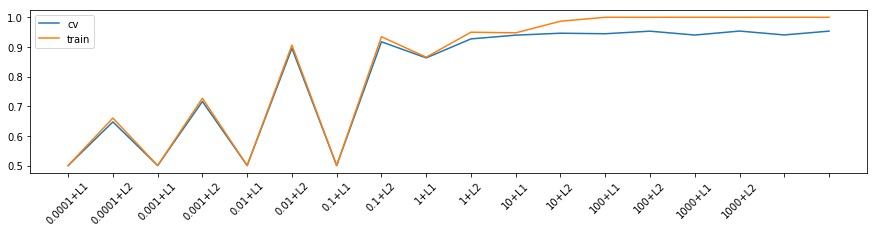

In [42]:
ticks = ['0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2','0.01+L1', '0.01+L2', '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1', '1000+L2']
plt.figure(figsize=(15,3))
plt.plot(range(len(C)*len(Penalities)), cv_scores)
plt.plot(range(len(C)*len(Penalities)), train_scores)
plt.xticks(range(len(C)*len(Penalities)), ticks, rotation = 45)
plt.legend(['cv','train'])
plt.show()

In [43]:
logReg = LogisticRegression(penalty = 'l2',C = 10)
logReg.fit(X_train_tfidf,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
pred = logReg.predict(X_test_tfidf)

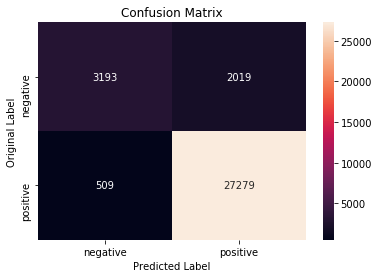

In [45]:
plot_confusion_matrix(y_test,pred)

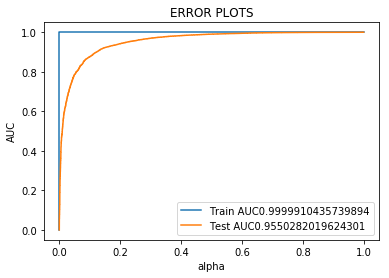

In [46]:
from sklearn.metrics import roc_curve,auc
train_fpr,train_tpr,thresholds = roc_curve(y_train,logReg.predict_proba(X_train_tfidf)[:,1])
test_fpr,test_tpr,thresholds = roc_curve(y_test,logReg.predict_proba(X_test_tfidf)[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC") 
plt.title("ERROR PLOTS")
plt.show()

#Top features of positive and neagative

In [47]:
feature = pd.DataFrame(data = logReg.coef_.reshape(-1,1),index = tfidf.get_feature_names())

In [48]:
negative = feature.sort_values(by=0)

In [49]:
negative[:10]

,0
disappoint,-19.222598
worst,-14.726808
terribl,-12.402615
aw,-11.448512
return,-11.422894
horribl,-9.616692
bad,-9.615161
bland,-9.276409
stale,-9.259352
unfortun,-9.163196


In [50]:
positive = feature.sort_values(by = 0,ascending = False)

In [51]:
positive[:10]

,0
great,20.030354
best,16.147755
delici,15.563816
love,14.639902
perfect,13.285883
excel,12.188550
good,11.716676
nice,10.680846
amaz,10.426712
high recommend,9.343067


#Word2vec

In [28]:
# train our word2vec model with our text corpus

list_of_sent = []
list_of_sent_cv = []
list_of_sent_test = []

for sent in X_train:
    list_of_sent.append(sent.split())
for sent_cv in X_cv:
    list_of_sent_cv.append(sent_cv.split())
for sent_test in X_test:
    list_of_sent_test.append(sent_test.split())  
  
  

In [15]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

D:\Anaconda\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
#Check the example how word2vec will get similar words

word2vec = Word2Vec(list_of_sent,min_count = 5,size = 50,workers = 4)#here mincount consider the 5 times occured words

print(word2vec.wv.most_similar('super'))

[('incred', 0.6251572370529175), ('fast', 0.624275803565979), ('tasti', 0.5924654006958008), ('downsid', 0.5806550979614258), ('soooo', 0.5756210088729858), ('saver', 0.5722575783729553), ('nutriti', 0.5568251609802246), ('quick', 0.5523755550384521), ('especi', 0.5434298515319824), ('easi', 0.5401326417922974)]


D:\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Average word2vec

In [56]:
from tqdm import tqdm
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; 
for sent in tqdm(list_of_sent):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in list(word2vec.wv.vocab):
            vec = word2vec.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 44890/44890 [09:53<00:00, 107.42it/s]


44890
50


In [57]:
from tqdm import tqdm
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_cv = []; 
for sent in tqdm(list_of_sent_cv):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in list(word2vec.wv.vocab):
            vec = word2vec.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████| 22110/22110 [03:46<00:00, 97.49it/s]


22110
50


In [58]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
Penalities = ['l1','l2']

cv_scores = []

train_scores = []

i=0

for a in C:
  for p in Penalities:
    logReg = LogisticRegression(penalty=p, C = a)
    logReg.fit(sent_vectors,y_train)
    scores = roc_auc_score(np.array(y_cv),logReg.predict_proba(sent_vectors_cv)[:,1])
    cv_scores.append(scores)
    scores = roc_auc_score(np.array(y_train),logReg.predict_proba(sent_vectors)[:,1])
    train_scores.append(scores)

    print("Cv scores {} and train Scores {} alpha {} penalty {}".format(cv_scores[i],train_scores[i],a,p))
    i +=1

Cv scores 0.5 and train Scores 0.5 alpha 1e-05 penalty l1
Cv scores 0.6721057782675355 and train Scores 0.6779090690996119 alpha 1e-05 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.0001 penalty l1
Cv scores 0.7970514649309514 and train Scores 0.7995989183717347 alpha 0.0001 penalty l2
Cv scores 0.7843624258292559 and train Scores 0.7786002558021158 alpha 0.001 penalty l1
Cv scores 0.8865972174235354 and train Scores 0.8854036094818211 alpha 0.001 penalty l2
Cv scores 0.8933045711227267 and train Scores 0.8915195881116662 alpha 0.01 penalty l1
Cv scores 0.8976568869493919 and train Scores 0.8959586962424098 alpha 0.01 penalty l2
Cv scores 0.8987649309025701 and train Scores 0.8971708400911158 alpha 0.1 penalty l1
Cv scores 0.8989603612448842 and train Scores 0.8973655485020827 alpha 0.1 penalty l2
Cv scores 0.8989097105103739 and train Scores 0.8975293997652674 alpha 1 penalty l1
Cv scores 0.898907299297342 and train Scores 0.8975438802145059 alpha 1 penalty l2
Cv scores 0.89887

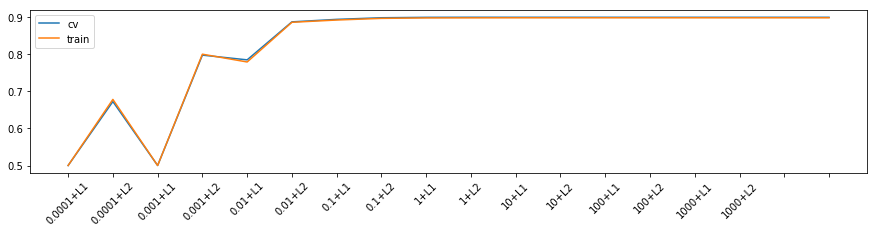

In [59]:
ticks = ['0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2','0.01+L1', '0.01+L2', '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1', '1000+L2']
plt.figure(figsize=(15,3))
plt.plot(range(len(C)*len(Penalities)), cv_scores)
plt.plot(range(len(C)*len(Penalities)), train_scores)
plt.xticks(range(len(C)*len(Penalities)), ticks, rotation = 45)
plt.legend(['cv','train'])
plt.show()

In [60]:
logReg = LogisticRegression(C = 10,penalty = 'l1')
logReg.fit(sent_vectors,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
list_of_sent_test = []

for sent in X_test:
  list_of_sent_test.append(sent.split())

In [62]:
from tqdm import tqdm
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; 
for sent in tqdm(list_of_sent_test):
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in list(word2vec.wv.vocab):
            vec = word2vec.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|████████████████████████████████████████████████████████████████████████████| 33000/33000 [05:49<00:00, 94.30it/s]


33000
50


In [63]:
pred = logReg.predict(sent_vectors_test)

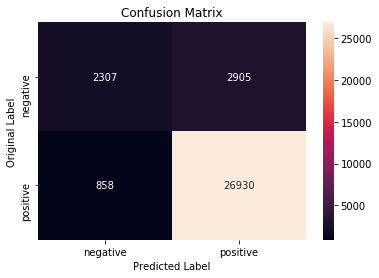

In [64]:
plot_confusion_matrix (y_test,pred)

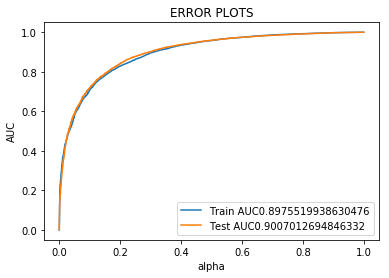

In [65]:
from sklearn.metrics import roc_curve,auc
train_fpr,train_tpr,thresholds = roc_curve(y_train,logReg.predict_proba(sent_vectors)[:,1])
test_fpr,test_tpr,thresholds = roc_curve(y_test,logReg.predict_proba(sent_vectors_test)[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC") 
plt.title("ERROR PLOTS")
plt.show()

#TDIDF Word2Vec

In [18]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
from sklearn.feature_extraction.text import TfidfVectorizer
train_classifier = TfidfVectorizer(ngram_range = (1,2))
tf_idf_matrix_train = train_classifier.fit_transform(X_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(train_classifier.get_feature_names(), list(train_classifier.idf_)))

In [19]:
# TF-IDF weighted Word2Vec
tfidf_feat_train = train_classifier.get_feature_names() # tfidf words/col-names

print("Printing Feature Names {}".format(tfidf_feat_train))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
from tqdm import tqdm
tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in list(word2vec.wv.vocab) and word in tfidf_feat_train:
            vec = word2vec.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|█████████████████████████████████████████████████████████████████████████| 44890/44890 [57:22:53<00:00,  1.11it/s]


In [21]:
from tqdm import tqdm
tfidf_sent_vectors_cv = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_cv): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in list(word2vec.wv.vocab) and word in tfidf_feat_train:
            vec = word2vec.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1

100%|██████████████████████████████████████████████████████████████████████████| 22110/22110 [8:07:33<00:00,  1.11it/s]


In [23]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
C = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
Penalities = ['l1','l2']

cv_scores = []

train_scores = []

i=0

for a in C:
  for p in Penalities:
    logReg = LogisticRegression(penalty=p, C = a)
    logReg.fit(tfidf_sent_vectors,y_train)
    scores = roc_auc_score(np.array(y_cv),logReg.predict_proba(tfidf_sent_vectors_cv)[:,1])
    cv_scores.append(scores)
    scores = roc_auc_score(np.array(y_train),logReg.predict_proba(tfidf_sent_vectors)[:,1])
    train_scores.append(scores)

    print("Cv scores {} and train Scores {} alpha {} penalty {}".format(cv_scores[i],train_scores[i],a,p))
    i +=1

Cv scores 0.5 and train Scores 0.5 alpha 1e-05 penalty l1
Cv scores 0.6612088518340591 and train Scores 0.6646922859845585 alpha 1e-05 penalty l2
Cv scores 0.5 and train Scores 0.5 alpha 0.0001 penalty l1
Cv scores 0.7729149994576082 and train Scores 0.7777449403435579 alpha 0.0001 penalty l2
Cv scores 0.7880861008228859 and train Scores 0.7951269051392278 alpha 0.001 penalty l1
Cv scores 0.8585082676006137 and train Scores 0.8645070546092086 alpha 0.001 penalty l2
Cv scores 0.8671545196733252 and train Scores 0.873040015355504 alpha 0.01 penalty l1
Cv scores 0.8711286243394443 and train Scores 0.8768705993488342 alpha 0.01 penalty l2
Cv scores 0.8727208541895892 and train Scores 0.8784513919078544 alpha 0.1 penalty l1
Cv scores 0.8728473864464039 and train Scores 0.8785143815203021 alpha 0.1 penalty l2
Cv scores 0.8729541911388679 and train Scores 0.8785631216325512 alpha 1 penalty l1
Cv scores 0.8729620635683182 and train Scores 0.878559407667074 alpha 1 penalty l2
Cv scores 0.872962

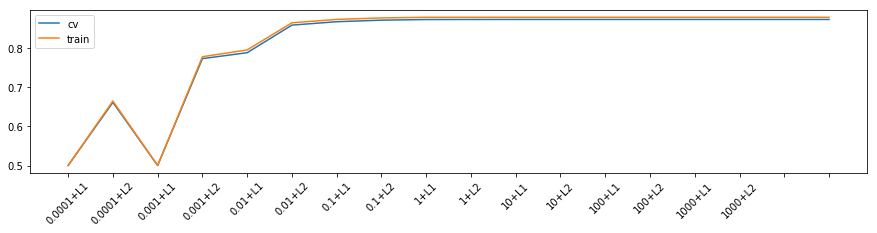

In [24]:
ticks = ['0.0001+L1', '0.0001+L2', '0.001+L1', '0.001+L2','0.01+L1', '0.01+L2', '0.1+L1', '0.1+L2', '1+L1', '1+L2', '10+L1', '10+L2', '100+L1', '100+L2','1000+L1', '1000+L2']
plt.figure(figsize=(15,3))
plt.plot(range(len(C)*len(Penalities)), cv_scores)
plt.plot(range(len(C)*len(Penalities)), train_scores)
plt.xticks(range(len(C)*len(Penalities)), ticks, rotation = 45)
plt.legend(['cv','train'])
plt.show()

In [26]:
logReg = LogisticRegression(penalty = 'l2',C = 100 )
logReg.fit(tfidf_sent_vectors,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
from tqdm import tqdm
tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in list(word2vec.wv.vocab) and word in tfidf_feat_train:
            vec = word2vec.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

 27%|█████████████████▊                                                 | 8770/33000 [5:12:35<21818:47:35, 3241.75s/it]

In [ ]:
pred = logReg.predict(tfidf_sent_vectors_test)

In [ ]:
plot_confusion_matrix(y_test,pred)

In [ ]:
from sklearn.metrics import roc_curve,auc
train_fpr,train_tpr,thresholds = roc_curve(y_train,logReg.predict_proba(sent_vectors)[:,1])
test_fpr,test_tpr,thresholds = roc_curve(y_test,logReg.predict_proba(sent_vectors_test)[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC"+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC"+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("alpha")
plt.ylabel("AUC") 
plt.title("ERROR PLOTS")
plt.show()